In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from IPython.core.interactiveshell import InteractiveShell
from scipy.stats import kurtosis, norm, skew
from tqdm.notebook import tqdm

InteractiveShell.ast_node_interactivity = "all"

In [2]:
stocks = [
    "KOZAA.IS",
    "HALKB.IS",
    "ISCTR.IS",
    "KCHOL.IS",
    "TAVHL.IS",
    "GUBRF.IS",
]

In [3]:
data = yf.download(tickers=stocks, interval="1d", period="5y")['Adj Close']

data.clip(lower=0, inplace=True)
data.fillna(0, inplace=True)

[*********************100%***********************]  6 of 6 completed


In [4]:
log_ret = (np.log(data) - np.log(data.shift(1))).dropna()
log_ret.tail()

,GUBRF.IS,HALKB.IS,ISCTR.IS,KCHOL.IS,KOZAA.IS,TAVHL.IS
Date,,,,,,
2021-09-21,-0.007061,-0.006572,0.000000,-0.019231,-0.009210,0.027006
2021-09-22,0.016946,0.002195,0.021134,0.007912,0.011324,0.008292
2021-09-23,-0.016946,-0.019934,-0.017258,-0.029322,0.020203,0.011494
2021-09-24,-0.020637,-0.041102,-0.023484,-0.024648,-0.031526,0.049373
2021-09-27,0.000851,0.000000,0.001978,0.009200,0.014836,0.011588


In [25]:
# Simulation
stock_count = log_ret.shape[1]
number_of_portfolios = 7500
portfolio_weights = np.zeros((number_of_portfolios, stock_count))
portfolio_returns = np.zeros(number_of_portfolios)
portfolio_volatilities = np.zeros(number_of_portfolios)
portfolio_sortino = np.zeros(number_of_portfolios)

for i in tqdm(range(number_of_portfolios)):
    # Weights
    weights = np.array(np.random.random(stock_count))

    # Normalize weights
    weights = weights/np.sum(weights)

    # Store weights
    portfolio_weights[i, :] = weights

    # Expected return
    portfolio_returns[i] = np.sum((log_ret.mean() * weights) * 252)

    # Expected downside volatility
    portfolio_volatilities[i] = np.sqrt(
        np.dot(weights.T, np.dot(log_ret[log_ret < 0].fillna(0).cov() * 252, weights)))
    
    # Sortino Ratio
    portfolio_sortino[i] = portfolio_returns[i] / portfolio_volatilities[i]

  0%|          | 0/7500 [00:00<?, ?it/s]

In [26]:
# Find maximum Sortino ratio and its return and volatility
max_sr = portfolio_sortino.argmax()
max_sr_ret = portfolio_returns[max_sr]
max_sr_vol = portfolio_volatilities[max_sr]

<Figure size 1296x720 with 0 Axes>

Text(0.5, 0, 'Volatility')

Text(0, 0.5, 'Return')

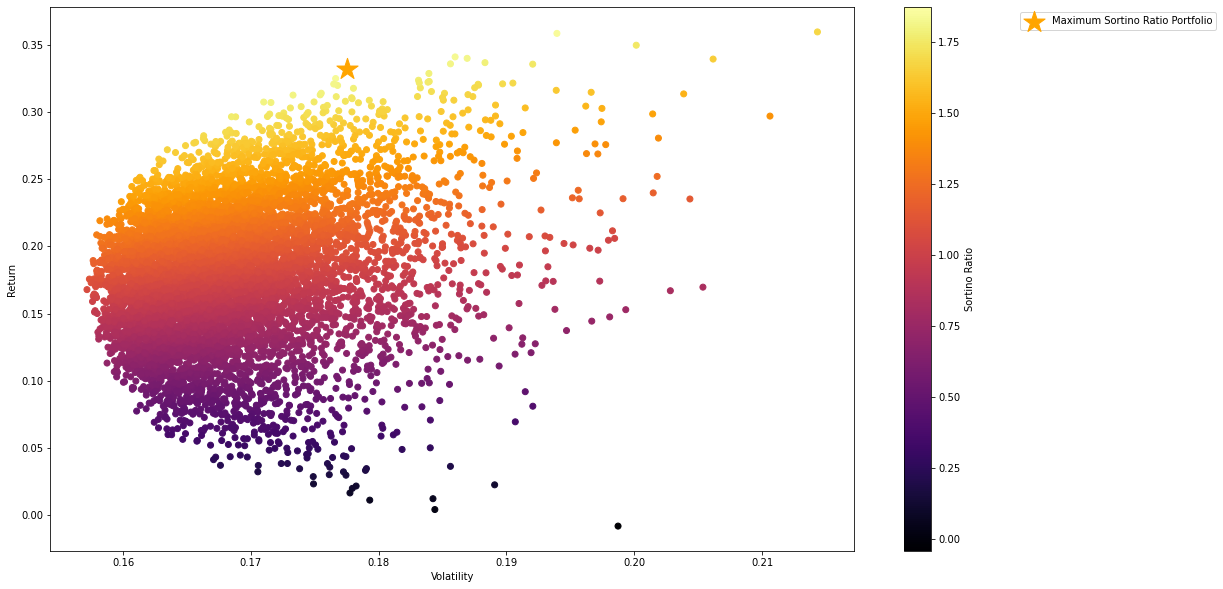

In [27]:
plt.figure(figsize=(18, 10))
plt.scatter(portfolio_volatilities, portfolio_returns,
            c=portfolio_sortino, cmap="inferno")
plt.colorbar(label="Sortino Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.scatter(max_sr_vol, max_sr_ret, c="orange", marker='*',
            s=500, label="Maximum Sortino Ratio Portfolio")
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))